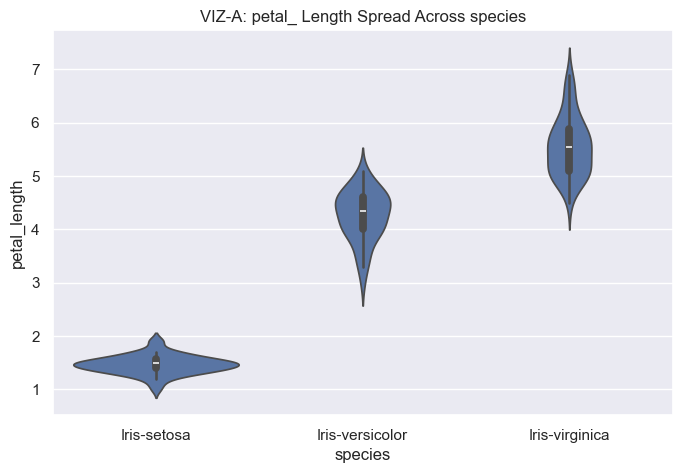

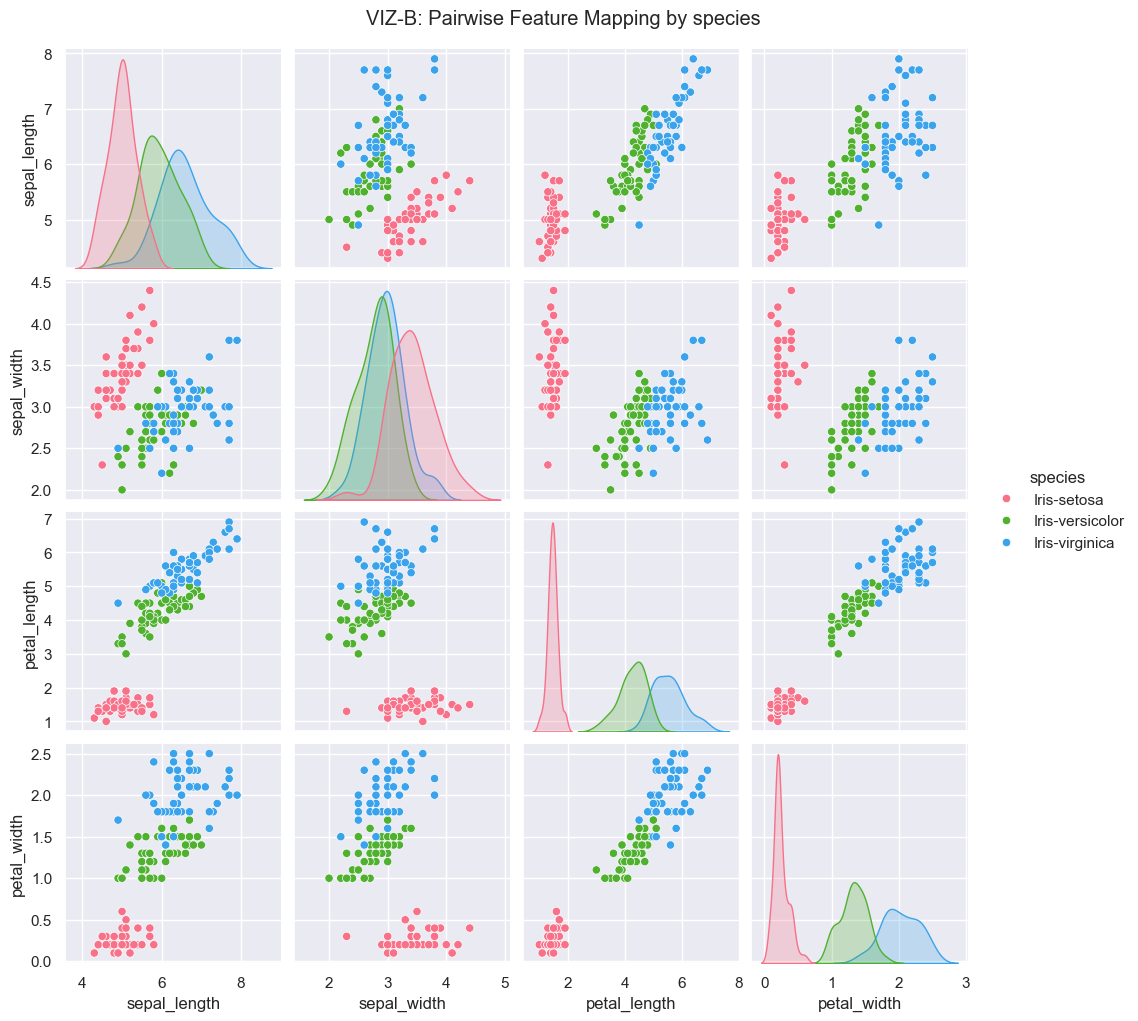

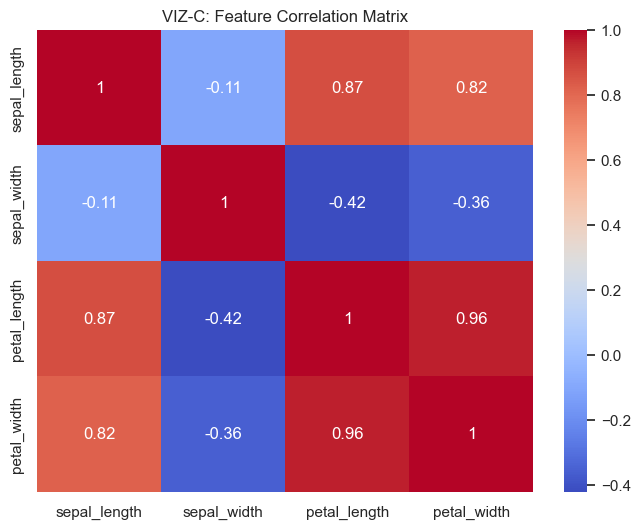

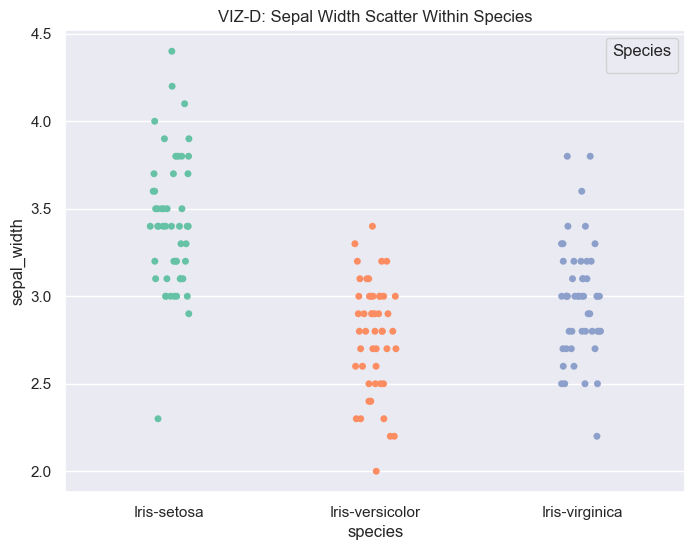

✅ Accuracy Score: 0.9666666666666667

📊 Confusion Matrix:
 [[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]

📋 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("IRIS.csv")
df.columns = [col.strip() for col in df.columns]
df["species"] = df["species"].str.strip()

plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="species", y="petal_length")
plt.title("VIZ-A: petal_ Length Spread Across species")
plt.show()

sns.pairplot(df, hue="species", palette="husl")
plt.suptitle("VIZ-B: Pairwise Feature Mapping by species", y=1.02)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("VIZ-C: Feature Correlation Matrix")
plt.show()

plt.figure(figsize=(8, 6))
plot = sns.stripplot(
    data=df,
    x="species",
    y="sepal_width",
    hue="species",
    palette="Set2",
    dodge=False,
    jitter=True
)
handles, labels = plot.get_legend_handles_labels()
plt.legend(handles[:3], labels[:3], title="Species", loc="upper right")
plt.title("VIZ-D: Sepal Width Scatter Within Species")
plt.show()

X = df.drop("species", axis=1)
y = df["species"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("✅ Accuracy Score:", accuracy_score(y_test, pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\n📋 Classification Report:\n", classification_report(y_test, pred))
